## Critérios para escolher o tamanho do segmento

### Abordagem baseada na rotação do eixo

Rotação do eixo do motor em RPM

CWRU : 1730, 1750, 1772 e 1797
Paderborn: 900 e 1500

Portando a frequência de rotação é em *ms*
CWRU : 

Por exemplo, o segmento para uma volta completas a uma taxa de amostragem de 48 kHz do CWRU com rotação de 1797 seria

# Resultados dos experimentos

### CNN com Batch Normalization

In [2]:
import matplotlib.pyplot as plt

def plot_training_history(total_history):

    for rep, history in enumerate(total_history):

        # Extrai os elementos da tupla
        loss, acc, val_loss, val_acc, final_acc = zip(*history)
        print(final_acc)
        for fold_idx in range(len(loss)):
            loss_cp = loss[fold_idx]
            acc_cp = acc[fold_idx]
            val_loss_cp = val_loss[fold_idx]
            val_acc_cp = val_acc[fold_idx]
            final_acc_cp = final_acc[fold_idx]

            epochs = range(1, len(loss_cp) + 1)

            plt.figure(figsize=(12, 4))

            # Loss
            plt.subplot(1, 2, 1)
            plt.plot(epochs, loss_cp, label='Train Loss')
            plt.plot(epochs, val_loss_cp, label='Val Loss')
            plt.title(f'Repetition: {rep+1}, Fold {fold_idx+1} - Loss\nFinal Acc: {final_acc_cp*100:.2f}%')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)

            # Accuracy
            plt.subplot(1, 2, 2)
            plt.plot(epochs, acc_cp, label='Train Acc')
            plt.plot(epochs, val_acc_cp, label='Val Acc')
            plt.title(f'Fold {fold_idx+1} - Accuracy\nFinal Acc: {final_acc_cp*100:.2f}%')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.grid(True)

            plt.tight_layout()
            plt.show()


### Box plot function

In [1]:
import matplotlib.pyplot as plt

def plot_accuracy_boxplot(fold_accuracies, title="Validation Accuracy by Fold"):
    """
    Plota um boxplot das acurácias organizadas por fold, com a média exibida.

    Args:
        fold_accuracies (list of list): Lista onde cada sublista representa as acurácias
                                        de uma repetição [fold1, fold2, fold3].
        title (str): Título do gráfico.
    """
    # Transpor para agrupar por fold: [(rep1_fold1, rep2_fold1, ...), ..., foldN]
    fold_data = list(zip(*fold_accuracies))
    num_folds = len(fold_data)
    labels = [f'Fold {i+1}' for i in range(num_folds)]

    # Calcular médias de cada fold
    means = [sum(fold) / len(fold) for fold in fold_data]

    plt.figure(figsize=(8, 6))
    box = plt.boxplot(fold_data, labels=labels, patch_artist=True, showmeans=True)

    # Exibe as médias acima de cada box
    for i, mean in enumerate(means):
        plt.text(i + 1, mean + 0.01, f"{mean*100:.2f}%", ha='center', va='bottom', fontsize=10, color='black')

    plt.title(title)
    plt.xlabel("Folds")
    plt.ylabel("Accuracy")
    plt.grid(axis='y')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


Modelo: CNN simples<br>
Número de épocas: 30<br>
Taxa de aprendizagem: 0.0001<br>

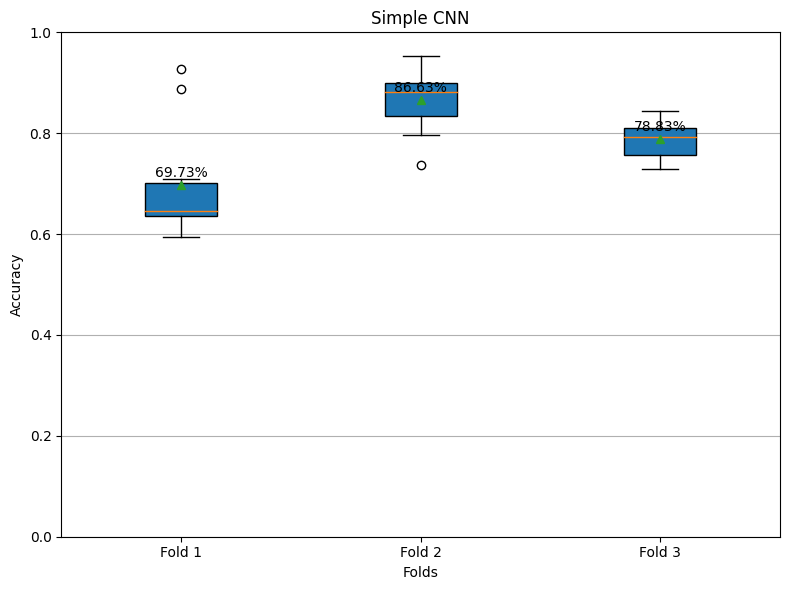

In [14]:
import pickle

with open("pkl_files/simple_cnn.pkl", "rb") as f:
    data = pickle.load(f)

total_history = data[0]
total_accuracies = data[1]
# plot_training_history(total_history)
plot_accuracy_boxplot(total_accuracies, title="Simple CNN")

Modelo: CNN com Batch Normalization<br>
Número de épocas: 30<br>
Taxa de aprendizagem: 0.0001<br>

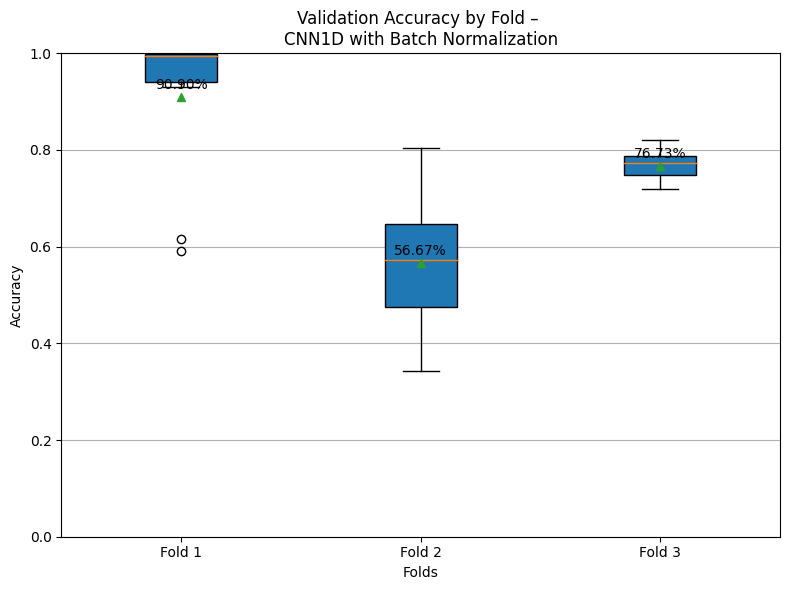

In [18]:
import pickle

with open("pkl_files/cnn_with_bn.pkl", "rb") as f:
    data = pickle.load(f)

total_history = data[0]
total_accuracies = data[1]
# plot_training_history(total_history)
plot_accuracy_boxplot(total_accuracies, title="Validation Accuracy by Fold – \nCNN1D with Batch Normalization")

Modelo: CNN com Batch Normalizatio e Dropout<br>
Número de épocas: 30<br>
Taxa de aprendizagem: 0.0001<br>

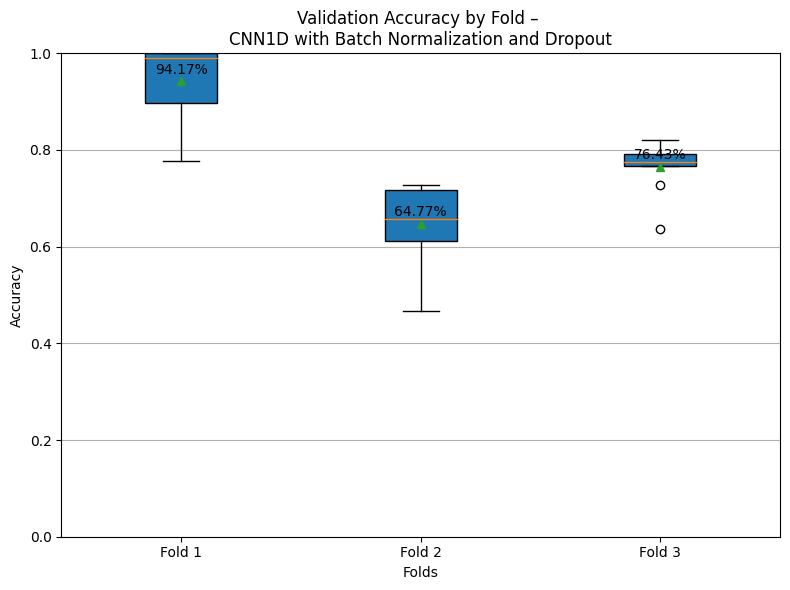

In [19]:
import pickle

with open("pkl_files/cnn_with_bn_dp.pkl", "rb") as f:
    data = pickle.load(f)

total_history = data[0]
total_accuracies = data[1]
# plot_training_history(total_history)
plot_accuracy_boxplot(total_accuracies, title="Validation Accuracy by Fold – \nCNN1D with Batch Normalization and Dropout")

## Aumento de dados

Calculo das frequências características

In [1]:
import numpy as np

def calcula_frequencias_caracteristicas(n, d, D, theta_deg, rpm):
    fr = rpm / 60  # Convert RPM to Hz
    theta = np.deg2rad(theta_deg)
    cos_theta = np.cos(theta)

    bpfi = 0.5 * n * fr * (1 + (d / D) * cos_theta)
    bpfo = 0.5 * n * fr * (1 - (d / D) * cos_theta)
    bsf = (D / (2 * d)) * fr * (1 - ((d / D) * cos_theta) ** 2)

    return bpfi, bpfo, bsf

# Parâmetros do 6205
n = 9
d = 7.94     # mm
D = 39.04    # mm
theta_deg = 0
rpm = 1797   # rotação usada nos testes do CWRU

bpfi, bpfo, bsf = calcula_frequencias_caracteristicas(n, d, D, theta_deg, rpm)
print(f"BPFI: {bpfi:.2f} Hz")
print(f"BPFO: {bpfo:.2f} Hz")
print(f"BSF : {bsf:.2f} Hz")


BPFI: 162.19 Hz
BPFO: 107.36 Hz
BSF : 70.58 Hz


CNN simples com aumento de dados

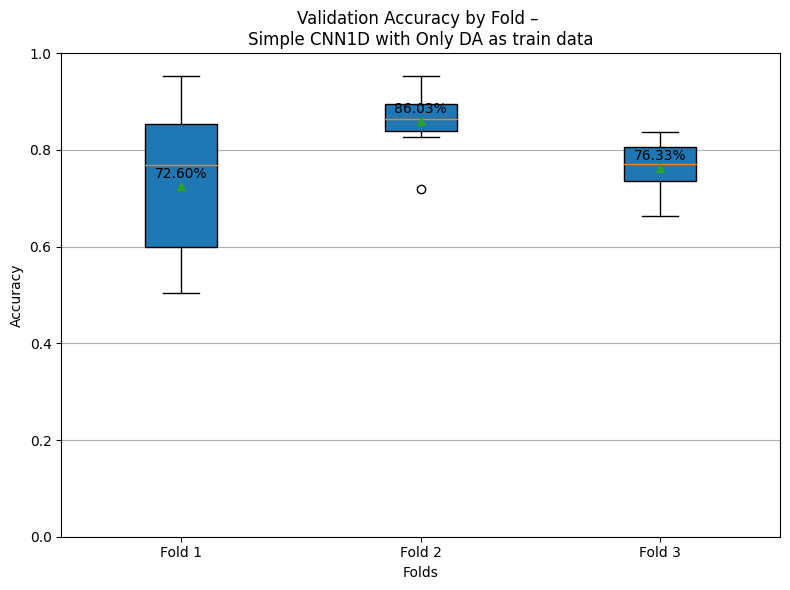

In [9]:
import pickle

with open("pkl_files/cnn_with_da.pkl", "rb") as f:
    data = pickle.load(f)

total_history = data[0]
total_accuracies = data[1]
# plot_training_history(total_history)
plot_accuracy_boxplot(total_accuracies, title="Validation Accuracy by Fold – \nSimple CNN1D with Only DA as train data")

CNN with base and DA

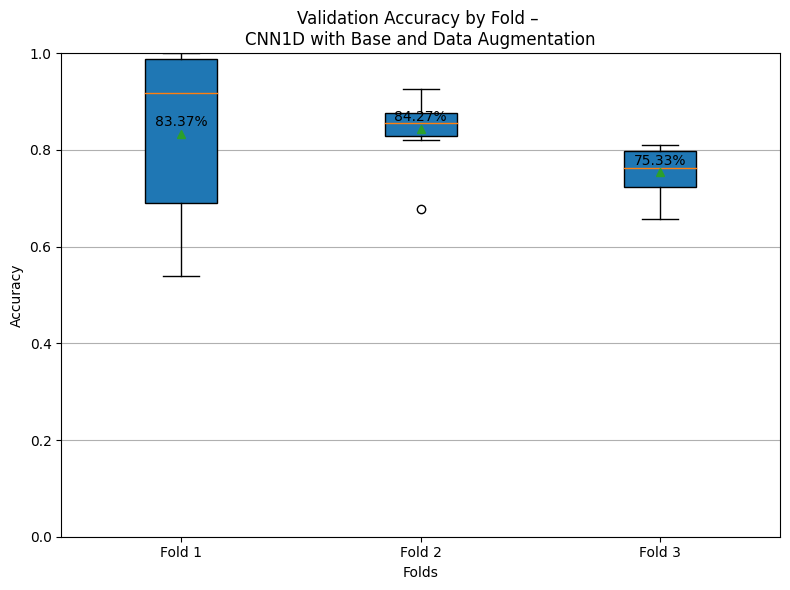

In [10]:
import pickle

with open("pkl_files/cnn_with_base_and_da.pkl", "rb") as f:
    data = pickle.load(f)

total_history = data[0]
total_accuracies = data[1]
# plot_training_history(total_history)
plot_accuracy_boxplot(total_accuracies, title="Validation Accuracy by Fold – \nCNN1D with Base and Data Augmentation")

## I e O

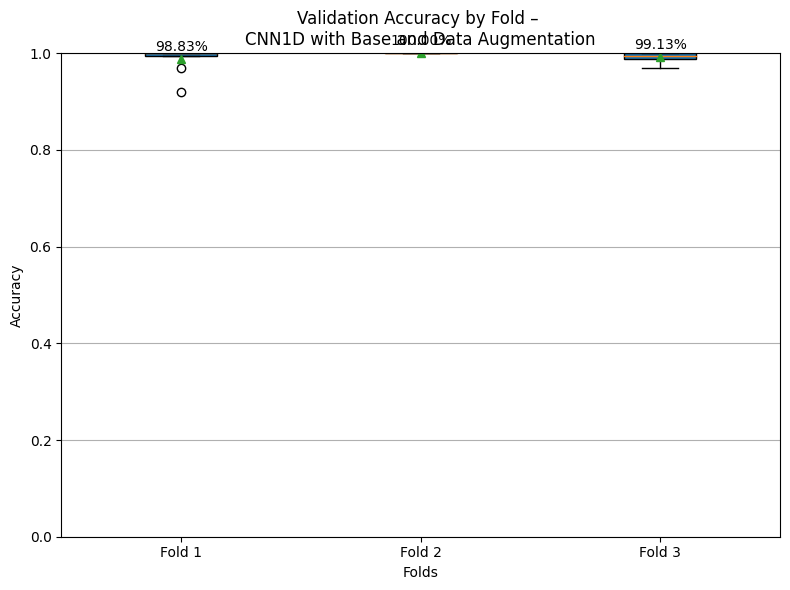

In [3]:
import pickle

with open("pkl_files/cnn2lc_da_base_dp_io.pkl", "rb") as f:
    data = pickle.load(f)

total_history = data[0]
total_accuracies = data[1]
# plot_training_history(total_history)
plot_accuracy_boxplot(total_accuracies, title="Validation Accuracy by Fold – \nCNN1D with Base and Data Augmentation")

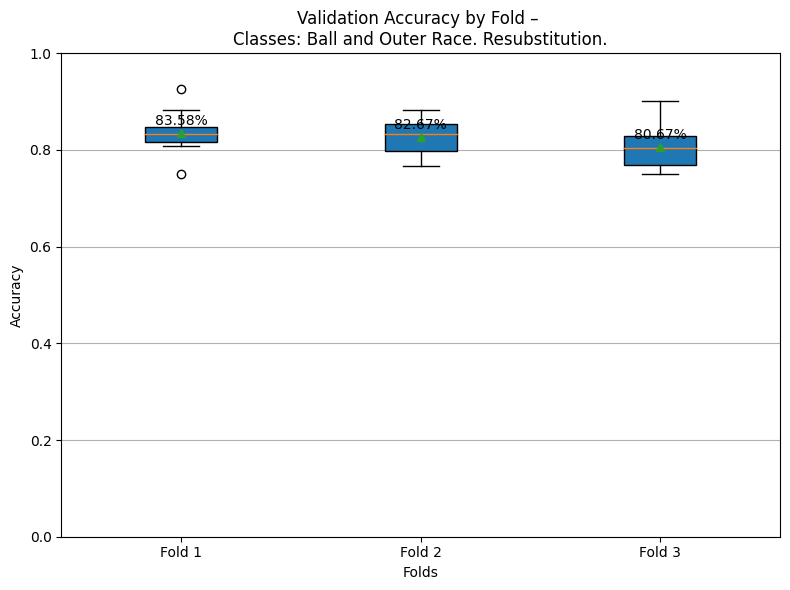

In [14]:
import pickle

with open("pkl_files/cnn_bo_res.pkl", "rb") as f:
    data = pickle.load(f)

total_history = data[0]
total_accuracies = data[1]
# plot_training_history(total_history)
plot_accuracy_boxplot(total_accuracies, title="Validation Accuracy by Fold – \nClasses: Ball and Outer Race. Resubstitution.")

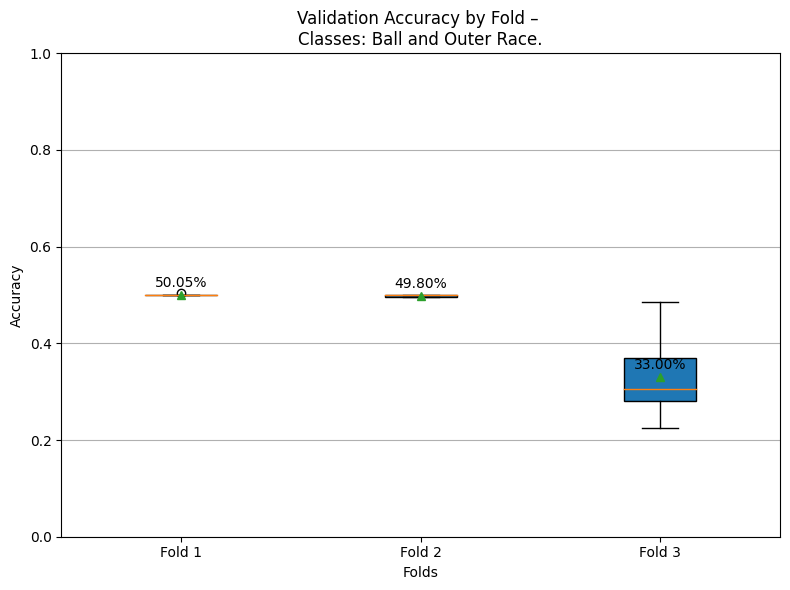

In [6]:
import pickle

with open("pkl_files/cnn_bo.pkl", "rb") as f:
    data = pickle.load(f)

total_history = data[0]
total_accuracies = data[1]
# plot_training_history(total_history)
plot_accuracy_boxplot(total_accuracies, title="Validation Accuracy by Fold – \nClasses: Ball and Outer Race.")

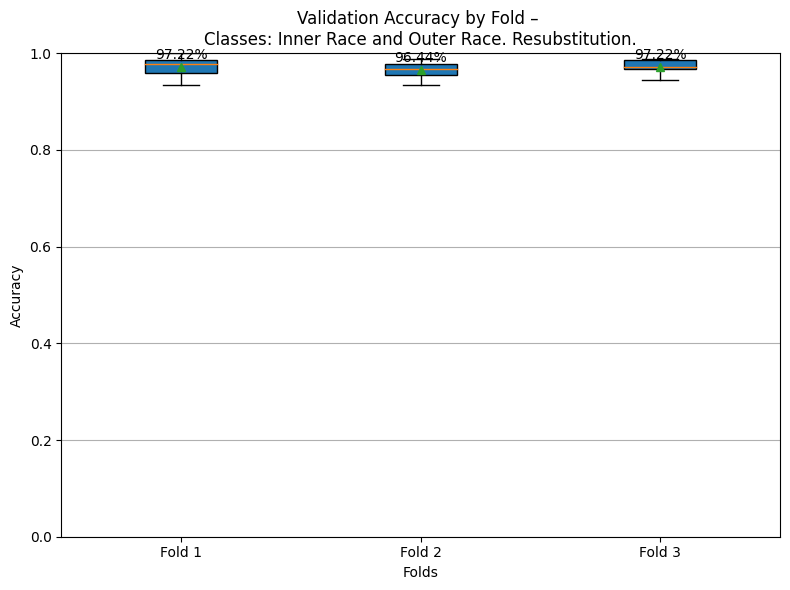

In [4]:
import pickle

with open("pkl_files/cnn_bi_res.pkl", "rb") as f:
    data = pickle.load(f)

total_history = data[0]
total_accuracies = data[1]
# plot_training_history(total_history)
plot_accuracy_boxplot(total_accuracies, title="Validation Accuracy by Fold – \nClasses: Inner Race and Outer Race. Resubstitution.")

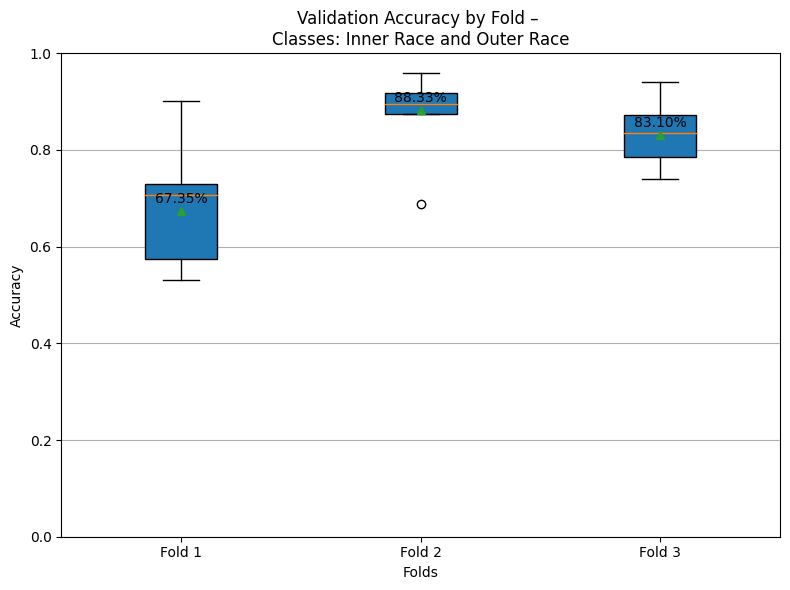

In [9]:
import pickle

with open("pkl_files/cnn_io.pkl", "rb") as f:
    data = pickle.load(f)

total_history = data[0]
total_accuracies = data[1]
# plot_training_history(total_history)
plot_accuracy_boxplot(total_accuracies, title="Validation Accuracy by Fold – \nClasses: Inner Race and Outer Race")

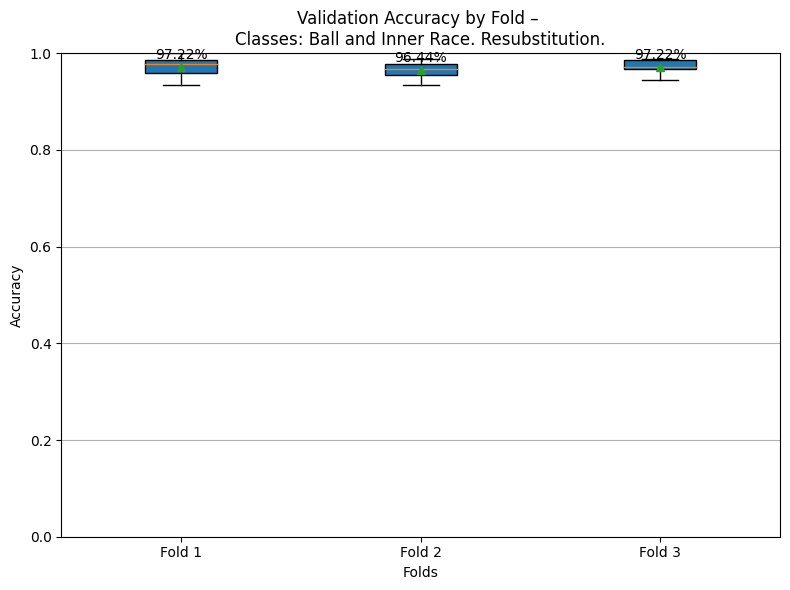

In [10]:
import pickle

with open("pkl_files/cnn_bi_res.pkl", "rb") as f:
    data = pickle.load(f)

total_history = data[0]
total_accuracies = data[1]
# plot_training_history(total_history)
plot_accuracy_boxplot(total_accuracies, title="Validation Accuracy by Fold – \nClasses: Ball and Inner Race. Resubstitution.")

In [ ]:
import pickle

with open("pkl_files/cnn_bi.pkl", "rb") as f:
    data = pickle.load(f)

total_history = data[0]
total_accuracies = data[1]
# plot_training_history(total_history)
plot_accuracy_boxplot(total_accuracies, title="Validation Accuracy by Fold – \nClasses: Ball and Inner Race. Resubstitution.")